In [1]:
from PIL import Image
import numpy as np

def average_hash(fname, size=18):
    img=Image.open(fname)
    img=img.convert('L')
    img=img.resize((size,size), Image.ANTIALIAS)
    pixel_data = img.getdata()
    pixels = np.array(pixel_data)
    pixels = pixels.reshape((size,size))
    #avg=pixels.mean()
    #diff=1*(pixels>avg)
    return pixels


ahash_2=average_hash('확실한지문.jpg')
ahash_3=average_hash('덜확실한지문.jpg')

#a = ahash_3.reshape(1,-1)
#b = ahash_4.reshape(1,-1)



''''print(ahash_1)
print(ahash_2)
print(ahash_3)'''

print(ahash_3)
#print(ahash_2)
#print((a !=b).sum())

[[242 243 245 246 246 253 255 254 253 252 255 255 252 252 254 254 253 254]
 [241 241 244 245 252 237 211 202 191 189 183 218 249 253 253 253 254 252]
 [236 236 240 242 216 183 167 178 166 177 172 162 197 250 252 252 253 252]
 [234 235 238 202 176 171 170 181 179 174 186 194 175 211 255 250 252 252]
 [233 236 224 175 178 172 173 167 178 174 176 191 193 195 250 251 251 251]
 [231 237 213 178 188 179 176 179 178 176 186 198 199 205 246 252 251 251]
 [232 236 212 184 184 180 174 178 177 182 183 190 195 205 243 251 250 251]
 [236 229 199 180 172 178 162 167 166 180 179 190 189 215 249 249 250 251]
 [238 216 187 180 179 173 157 156 163 178 176 190 193 207 245 249 248 249]
 [235 210 186 187 184 171 166 156 170 176 179 185 192 200 245 248 248 249]
 [234 217 195 188 183 173 162 161 169 176 178 178 182 196 244 246 247 248]
 [238 222 203 187 191 180 161 158 164 165 165 175 178 207 245 244 246 247]
 [240 226 205 197 190 175 158 160 161 161 158 173 171 212 246 244 245 246]
 [240 232 218 211 198 185

In [2]:
from PIL import Image
import numpy as np

with open("3.jpg","rb") as file:
    img = Image.open(file)
    img = img.convert("RGB")
    img = img.resize((28,28))
    data = np.asarray(img)
    print(len(list(data)))
    print(len(list(data[0])))
    print(data)
    img.save("test3.png")

28
28
[[[160 162 161]
  [162 164 163]
  [163 165 164]
  ...
  [176 178 177]
  [174 176 175]
  [173 175 174]]

 [[165 167 166]
  [164 166 165]
  [163 165 164]
  ...
  [176 178 177]
  [174 176 175]
  [175 177 176]]

 [[164 166 165]
  [168 170 169]
  [167 169 168]
  ...
  [175 177 176]
  [177 179 178]
  [175 177 176]]

 ...

 [[170 181 183]
  [166 177 179]
  [169 180 182]
  ...
  [186 192 192]
  [190 196 196]
  [189 195 195]]

 [[173 184 186]
  [169 180 182]
  [170 181 183]
  ...
  [188 194 194]
  [188 194 194]
  [189 195 195]]

 [[168 179 181]
  [169 180 182]
  [167 178 180]
  ...
  [189 195 195]
  [189 195 195]
  [189 195 195]]]


In [3]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.cross_validation import train_test_split

#분류 대상 카테고리 선택하기
caltech_dir="./지문"
categories = ["형원검지","재영검지"]
nb_classes = len(categories)

#이미지 크기 지정
image_w=64
image_h=64
pixels = image_w * image_h *3

#이미지 데이터 읽어 들이기
X_train = []
y_train = []
X_test = []
y_test = []


for idx, cat in enumerate(categories):
    #레이블 지정
    label = [0 for i in range(nb_classes)]
    label[idx]=1
    #이미지
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        length = len(files)
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        if i < length * 0.7:
            X_train.append(data)
            y_train.append(label)
        else:
            X_test.append(data)
            y_test.append(label)
        for angle in range(-30,30,5):
            img2 = img.rotate(angle)
            data = np.asarray(img2)
            if i < length * 0.7:
                X_train.append(data)
                y_train.append(label)
            #img2=img2.transpose(Image.FLIP_LEFT_RIGHT)
            #data = np.asarray(img2)
            #if i < length * 0.7:
                #X_train.append(data)
                #y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./지문/f.npy", xy)
print("ok", len(X_train), len(y_train), len(X_test), len(y_test))

('ok', 4875, 4875, 160, 160)


In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np

#카테고리 지정하기
categories = ["형원검지","재영검지"]
nb_classes = len(categories)

#이미지 크기 지정하기
image_w =64
image_h =64

#데이터 열기
X_train, X_test, y_train, y_test = np.load("./지문/f.npy")

#데이터 정규화하기
X_train = X_train.astype("float") / 256
X_test = X_test.astype("float") / 256
print('X_train shape:', X_train.shape)

#모델 구축하기
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3,border_mode='same', input_shape=X_train.shape[1:]))
model1.add(Activation('relu')) 
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Convolution2D(64, 3, 3, border_mode='same'))
model1.add(Activation('relu'))
model1.add(Convolution2D(64, 3, 3))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Convolution2D(64, 3, 3, border_mode='same'))
model1.add(Activation('relu')) #relu
model1.add(Convolution2D(32, 3, 3))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu')) #relu
model1.add(Dense(nb_classes))
model1.add(Activation('softmax')) #softmax
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#모델 훈련하기
model1.fit(X_train, y_train, batch_size=25,nb_epoch=30)

#모델 평가하기
score1 = model1.evaluate(X_test, y_test)
print('loss=', score1[0])
print('accuracy=', score1[1])

('X_train shape:', (4875, 64, 64, 3))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(64, 64, 3...)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/30
4875/4875 [==============================] - 3s 540us/step - loss: 0.5800 - acc: 0.7659
Epoch 2/30
4875/4875 [==============================] - 2s 422us/step - loss: 0.3334 - acc: 0.8646
Epoch 3/30
4875/4875 [==============================] - 2s 381us/step - loss: 0.2059 - acc: 0.9383
Epoch 4/30
4875/4875 [==============================] - 2s 392us/step - loss: 0.1174 - acc: 0.9633
Epoch 5/30
4875/4875 [==============================] - 2s 407us/step - loss: 0.0823 - acc: 0.9733
Epoch 6/30
4875/4875 [==============================] - 2s 373us/step - loss: 0.0665 - acc: 0.9822
Epoch 7/30
4875/4875 [==============================] - 2s 388us/step - loss: 0.0763 - acc: 0.9785
Epoch 8/30
4875/4875 [==============================] - 2s 386us/step - loss: 0.0457 - acc: 0.9883
Epoch 9/30
4875/4875 [==============================] - 2s 391us/step - loss: 0.0462 - acc: 0.9861
Epoch 10/30
4875/4875 [==============================] - 2s 389us/step - loss: 0.0435 - acc: 0.9924
Epoch 11/

In [6]:
#예측하기
pre = model1.predict(X_test)
#예측결과테스트하기
for i, v in enumerate(pre):
    pre_ans = v.argmax() #예측한 레이블
    ans = y_test[i].argmax() #정답 레이블
    dat = X_test[i] #이미지 데이터
    if ans == pre_ans: continue
    #예측이 틀리면 무엇이 틀렸는지 출력하기
    print("[NG]", categories[pre_ans], "!=", categories[ans])
    print(v)
    #이미지 출력하기
    fname = "./지문/error1/" + str(i) + "-" + categories[pre_ans] + "-ne-"+categories[ans] + ".JPG"
    dat*=256
    img = Image.fromarray(np.uint8(dat))
    img.save(fname)

In [7]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
__________

In [8]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.cross_validation import train_test_split

#분류 대상 카테고리 선택하기
caltech_dir="./지문"
categories2 = ["형원검지","재영검지","형원중지","재영중지"]
nb_classes2 = len(categories2)

#이미지 크기 지정
image_w=64
image_h=64
pixels = image_w * image_h *3

#이미지 데이터 읽어 들이기
X2_train = []
y2_train = []
X2_test = []
y2_test = []


for idx, cat in enumerate(categories2):
    #레이블 지정
    label = [0 for i in range(nb_classes2)]
    label[idx]=1
    #이미지
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        length = len(files)
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        if i < length * 0.7:
            X2_train.append(data)
            y2_train.append(label)
        else:
            X2_test.append(data)
            y2_test.append(label)
        for angle in range(-20,20,5): #-25 25 5 에서 바꿈
            img2 = img.rotate(angle)
            data = np.asarray(img2)
            if i < length * 0.7:
                X2_train.append(data)
                y2_train.append(label)
            #img2=img2.transpose(Image.FLIP_LEFT_RIGHT)
            #data = np.asarray(img2)
            #if i < length * 0.7:
                #X2_train.append(data)
                #y2_train.append(label)
X2_train = np.array(X2_train)
y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
y2_test = np.array(y2_test)

xy2 = (X2_train, X2_test, y2_train, y2_test)
np.save("./지문/f2.npy", xy2)
print("ok", len(X2_train), len(y2_train), len(X2_test), len(y2_test))

('ok', 4617, 4617, 218, 218)


In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np


categories2 = ["형원검지","재영검지","형원중지","재영중지"]
nb_classes2 = len(categories2)

image_w =64
image_h =64

X2_train, X2_test, y2_train, y2_test = np.load("./지문/f2.npy")

X2_train = X2_train.astype("float") / 256
X2_test = X2_test.astype("float") / 256
print('X2_train shape:', X2_train.shape)

model2 = Sequential()
model2.add(Convolution2D(32, 3, 3,border_mode='same', input_shape=X2_train.shape[1:]))
model2.add(Activation('relu')) # relu
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Convolution2D(64, 3, 3, border_mode='same'))
model2.add(Activation('relu')) #relu
model2.add(Convolution2D(64, 3, 3))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Convolution2D(64, 3, 3, border_mode='same'))
model2.add(Activation('relu')) #relu
model2.add(Convolution2D(32, 3, 3))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
# 하나 추가함

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu')) #relu
model2.add(Dense(nb_classes2))
model2.add(Activation('softmax')) #softmax
model2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model2.fit(X2_train, y2_train, batch_size=25,nb_epoch=30) #epoch 50에서 바꿈

score2 = model2.evaluate(X2_test, y2_test)
print('loss=', score2[0])
print('accuracy=', score2[1])

('X2_train shape:', (4617, 64, 64, 3))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(64, 64, 3...)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/30
4617/4617 [==============================] - 3s 567us/step - loss: 0.4762 - acc: 0.7923
Epoch 2/30
4617/4617 [==============================] - 2s 374us/step - loss: 0.1973 - acc: 0.9205
Epoch 3/30
4617/4617 [==============================] - 2s 388us/step - loss: 0.1061 - acc: 0.9650
Epoch 4/30
4617/4617 [==============================] - 2s 420us/step - loss: 0.0696 - acc: 0.9758
Epoch 5/30
4617/4617 [==============================] - 2s 418us/step - loss: 0.0448 - acc: 0.9856
Epoch 6/30
4617/4617 [==============================] - 2s 388us/step - loss: 0.0401 - acc: 0.9870
Epoch 7/30
4617/4617 [==============================] - 2s 386us/step - loss: 0.0390 - acc: 0.9886
Epoch 8/30
4617/4617 [==============================] - 2s 435us/step - loss: 0.0294 - acc: 0.9901
Epoch 9/30
4617/4617 [==============================] - 2s 408us/step - loss: 0.0329 - acc: 0.9919
Epoch 10/30
4617/4617 [==============================] - 2s 381us/step - loss: 0.0260 - acc: 0.9930
Epoch 11/

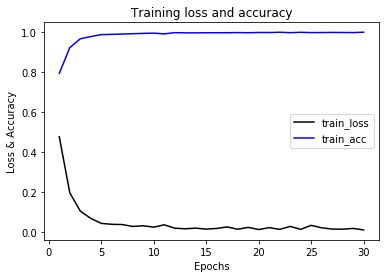

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history.history['acc']

loss = history.history['loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'black', label='train_loss')
plt.plot(epochs, acc, 'blue', label='train_acc')

plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()

plt.show()

In [15]:
#예측하기
pre2 = model2.predict(X2_test)
#예측결과테스트하기
for i, v in enumerate(pre2):
    pre2_ans = v.argmax()
    ans2 = y2_test[i].argmax()
    dat2 = X2_test[i]
    if ans2 == pre2_ans: continue
    #예측이 틀리면 무엇이 틀렸는지 출력하기
    print("[NG]", categories2[pre2_ans], "!=", categories2[ans2])
    print(v)
    #이미지 출력하기
    fname2 = "./지문/error2/" + str(i) + "-" + categories2[pre2_ans] + "-ne-"+categories2[ans2] + ".JPG"
    dat2*=256
    img = Image.fromarray(np.uint8(dat2))
    img.save(fname2)

('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa7\x80')
[4.3121397e-01 1.7630142e-05 5.6876838e-01 2.3721444e-25]
('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa7\x80')
[1.3023482e-02 1.0374905e-18 9.8697656e-01 1.1585423e-28]
('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa7\x80')
[2.4230772e-07 8.5342183e-13 9.9999976e-01 3.2864789e-27]
('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa7\x80')
[1.11297183e-02 1.14897405e-17 9.88870263e-01 2.00533238e-35]
('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa7\x80')
[1.2722713e-13 4.4780899e-27 1.0000000e+00 0.0000000e+00]
('[NG]', '\xed\x98\x95\xec\x9b\x90\xec\xa4\x91\xec\xa7\x80', '!=', '\xed\x98\x95\xec\x9b\x90\xea\xb2\x80\xec\xa

In [16]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 64)        36928     
__________

In [17]:
#새로운 이미지 파일들 넣어서 어떤 카테고리로 분류하는지 

model2.save("tensorflow_model2.h5") #model 저장하기

from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./지문/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
from tensorflow import keras
model = load_model('./tensorflow_model2.h5')

prediction = model2.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    #print(i)
    #print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "형원검지"
    elif pre_ans == 1: pre_ans_str = "재영검지"
    elif pre_ans == 2: pre_ans_str = "형원중지"
    else: pre_ans_str = "재영중지"
    
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[0]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

해당 ./지문/imgs_others_test/재영검지2.jpg이미지는 재영검지으로 추정됩니다.
해당 ./지문/imgs_others_test/재영검지1.jpg이미지는 재영검지으로 추정됩니다.
해당 ./지문/imgs_others_test/재영중지2.jpg이미지는 재영중지로 추정됩니다.
해당 ./지문/imgs_others_test/재영중지1.jpg이미지는 재영중지로 추정됩니다.
해당 ./지문/imgs_others_test/형원검지12.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/형원검지11.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/형원중지2.jpg이미지는 형원중지로 추정됩니다.
해당 ./지문/imgs_others_test/형원중지1.jpg이미지는 형원중지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원중지4.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원중지3.jpg이미지는 형원중지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원중지2.jpg이미지는 형원중지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원중지1.jpg이미지는 형원중지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원검지4.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원검지3.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원검지2.jpg이미지는 형원검지로 추정됩니다.
해당 ./지문/imgs_others_test/sample_형원검지1.jpg이미지는 형원검지로 추정됩니다.


In [1]:

import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.05
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.
